<a href="https://colab.research.google.com/github/spacemaninSeoul/justpractice/blob/main/examine_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

컨볼루션 신경망에 익숙해지기 위해 또 다른 데이터셋을 이용한다. CIFAR-10 데이터셋은 총 열 개의 클래스를 다루며, 더 확장된 데이터셋인 CIFAR-100 데이터셋은 100개의 클래스를 다룬다. 이 데이터셋은 기본적인 데이터셋으로 연습을 위해 자주 사용하지만, 좋은 성능을 기대하긴 어렵다.

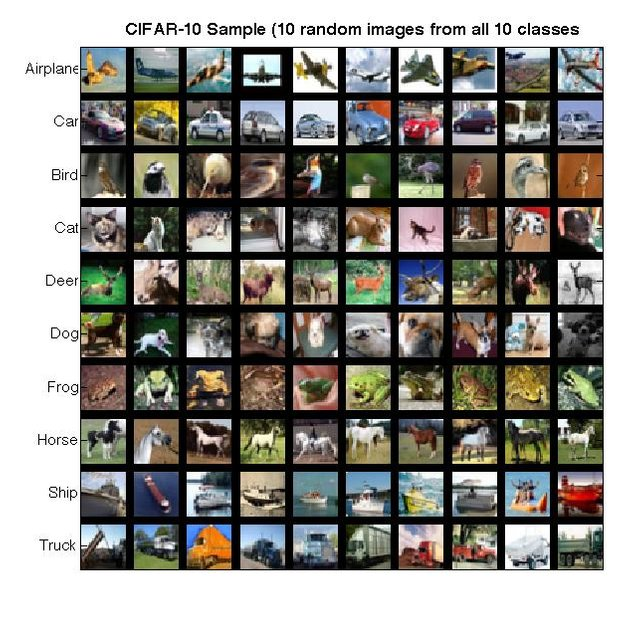

MNIST 데이터셋과 동일하게 총 50,000개의 학습 데이터와 10,000개의 테스트 데이터가 주어진다. 클래스 개수는 MNIST 데이터셋과 동일하지만, 데이터의 복잡도가 훨씬 높아 신경망이 특징을 검출하기가 매우 어렵다.

# 1. 데이터 살펴보기

데이터를 다운받고, 형태를 출력하도록 한다. 레이블은 0~9로 구성되어 있다.

In [1]:
# CIFAR-10 데이터셋 다운받기
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170508288/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


기본적으로 케라스가 제공하는 데이터셋은 전부 정리가 잘 되어 있어 학습하기가 편리하다. 이미지의 크기 또한 (32, 32, 3)으로 학습하기에 어려움이 없는 저해상도에 해당한다. 몇 개의 이미지를 그려보도록 한다.

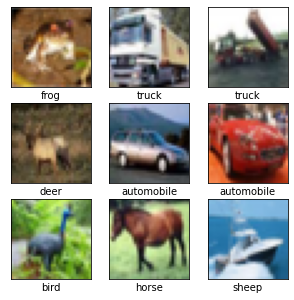

In [2]:
# CIFAR-10 데이터 그려보기
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'sheep', 'truck']

sample_size = 9
random_idx = np.random.randint(60000, size= sample_size)

plt.figure(figsize= (5, 5))
for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap='gray')
  plt.xlabel(class_names[int(y_train[i])])
plt.show()

다음으로 신경망 모델의 입력으로 사용하기 위해 데이터가 가지는 값의 범위를 조절하도록 한다.
이전에 했던 방법과 다르게 이번에는 데이터셋의 평균과 표준 편차를 채널별로 구해 표준화를 진행한다.

In [3]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [4]:
# CIFAR-10 데이터셋 전처리 과정
# 평균과 표준 편차는 채널별로 구한다.
x_mean = np.mean(x_train, axis=(0, 1, 2))
x_std = np.std(x_train, axis= (0, 1, 2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

print(x_train.shape, len(y_train))
print(x_test.shape, len(y_test))

(35000, 32, 32, 3) 35000
(10000, 32, 32, 3) 10000


In [5]:
x_train

array([[[[ 6.77740913e-01,  5.32296566e-01,  4.06785963e-01],
         [ 6.45991464e-01,  5.00084589e-01,  3.91794560e-01],
         [ 6.61866189e-01,  5.16190578e-01,  4.21777365e-01],
         ...,
         [ 8.84112331e-01,  7.25568426e-01,  6.46648403e-01],
         [ 8.99987056e-01,  7.41674414e-01,  6.76631208e-01],
         [ 9.63485954e-01,  8.06098367e-01,  7.36596818e-01]],

        [[ 6.14242015e-01,  5.32296566e-01,  4.06785963e-01],
         [ 5.98367291e-01,  5.32296566e-01,  3.76803158e-01],
         [ 6.14242015e-01,  5.32296566e-01,  3.61811755e-01],
         ...,
         [ 8.36488158e-01,  6.45038484e-01,  6.16665598e-01],
         [ 8.36488158e-01,  6.77250461e-01,  6.46648403e-01],
         [ 8.99987056e-01,  7.41674414e-01,  7.06614013e-01]],

        [[ 4.23745321e-01,  3.06812729e-01,  1.21949315e-01],
         [ 4.39620046e-01,  3.22918718e-01,  7.69751074e-02],
         [ 4.87244219e-01,  3.87342671e-01,  6.19837049e-02],
         ...,
         [ 7.57114535e-0

# 2. 모델 구성하기


In [6]:
print(x_train.shape, len(y_train))
print(x_test.shape, len(y_test))

(35000, 32, 32, 3) 35000
(10000, 32, 32, 3) 10000


In [7]:
# CIFAR-10 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
# (32, 32, 3)의 데이터를 입력으로 받는다.
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation='relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation='relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax')) # 열 개의 출력을 가지는 신경망

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

복잡한 데이터일수록 모델을 깊게 구성해본다. 실험적으로 모델을 먼저 깊게 구성해보고, 얕게 구성하는 방향으로 진행하는 것이 효율적일 수 있다. 또한, 옵티마이저 Adam의 학습률을 0.0001(1e-4)로 조정하고, 손실 함수는 sparse_categorical_crossentropy를 사용했다. 같은 형태를 가지고 있는 MNIST 데이터셋에서 원-핫 인코딩을 이용하여 레이블의 형태를 범주형 형태로 변환한 적이 있다. 이때 손실 함수는 categorical_crossentropy를 사용했다. 만약 원-핫 인코딩을 하지 않고, 0~0로 되어 있는 형태의 레이블을 그대로 사용하고 싶다면 sparse_categorical_crossentropy를 사용한다.

model.summary() 함수를 사용해 모델 구조와 파라미터 수를 확인하도록 한다.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# 3. 모델 학습

30회를 실시한다. 이전에 사용한 예제들과 달리 학습이 오래 걸린다.

In [9]:
# CIFAR-10 모델 학습하기
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 30s 18ms/step - loss: 1.6202 - acc: 0.4124 - val_loss: 1.4009 - val_acc: 0.4987
Epoch 2/30
1094/1094 [==============================] - 21s 19ms/step - loss: 1.2655 - acc: 0.5493 - val_loss: 1.1838 - val_acc: 0.5827
Epoch 3/30
1094/1094 [==============================] - 18s 17ms/step - loss: 1.0911 - acc: 0.6163 - val_loss: 1.1007 - val_acc: 0.6113
Epoch 4/30
1094/1094 [==============================] - 22s 20ms/step - loss: 0.9525 - acc: 0.6677 - val_loss: 1.0352 - val_acc: 0.6354
Epoch 5/30
1094/1094 [==============================] - 21s 19ms/step - loss: 0.8530 - acc: 0.7031 - val_loss: 0.9445 - val_acc: 0.6653
Epoch 6/30
1094/1094 [==============================] - 19s 17ms/step - loss: 0.7654 - acc: 0.7342 - val_loss: 0.8656 - val_acc: 0.6974
Epoch 7/30
1094/1094 [==============================] - 19s 17ms/step - loss: 0.6853 - acc: 0.7641 - val_loss: 0.8535 - val_acc: 0.7011
Epoch 8/30
1094/1094 [==========================

모델의 history 객체를 통해 학습 과정을 그려본다.

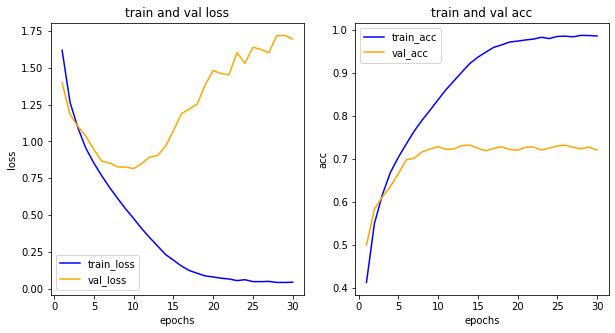

In [10]:
# CIFAR-10 학습 과정 그려보기.
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5 ))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange',label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

학습 결과에서 과대적합의 문제가 발생하는 것을 볼 수 있다. 과대적합을 예방하는 방법을 알아보기 전에, 모델이 학습한 특징을 시각화하는 방법을 알아보도록 한다.

신경망의 큰 단점 중 하나는 작동 과정을 정확히 이해할 수 없는 상태, 즉 블랙박스인 모델을 쉽게 해석할 수 없다는 점이다. 아무리 모델의 성능이 좋다 하더라도 왜 성능이 좋은지 알지 못하면, 향후 모델의 견고함과 일반화를 위한 실험 방향 설정과 실제 서비스나 연구에서 왜 그러한 정답이 보이는지를 설명할 수 없어 신뢰성이 떨어지는 결과를 제공할 수 있다. 의료, 경제 분석 등의 분야에서는 이러한 설명이 매우 중요하다.

예를 들어, 환자가 병원에서 AI를 통해 진료를 받을 때 의사가 결과를 설명하지 않고 단순히 "AI를 통해 검사를 해보았더니 음성으로 판정되었다"라고 한다면 우리는 의사의 진료를 얼마나 신뢰할 수 있을까? 아마 신뢰할 수 없을 것이다. 여기서 우리는 의사가 설명하지 않으려고 한 것이 아니라 AI의 결과를 해석할 수 없기에 설명하지 못한 것을 알아야 한다.

다행히도 신경망을 해석하기 위해 많은 노력이 이루어지고 있다. 이를 설명 가능한 AI(XAI: eXplainable AI)라고 한다.

모델이 학습한 특징을 시각화하는 방법 또한, 모델을 해석하는 것에 도움이 될 수 있다. 아래 코드를 활용하면 쉽게 이미지에서 모델이 인식한 특징을 확인할 수 있다. 예제에서는 CIFAR-10 데이터셋의 두 번째 테스트 데이터(배)를 시각화하고 있다. 실행 결과에서 배의 모양을 나타내는 특징맵을 확인할 수 있다. (실행 결과는 전체 결과의 일부이다)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


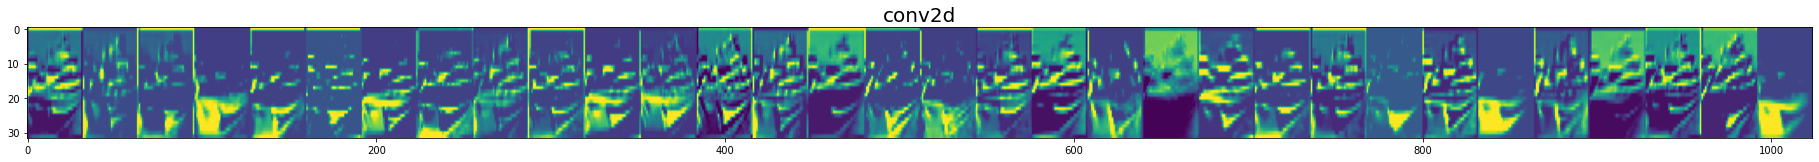

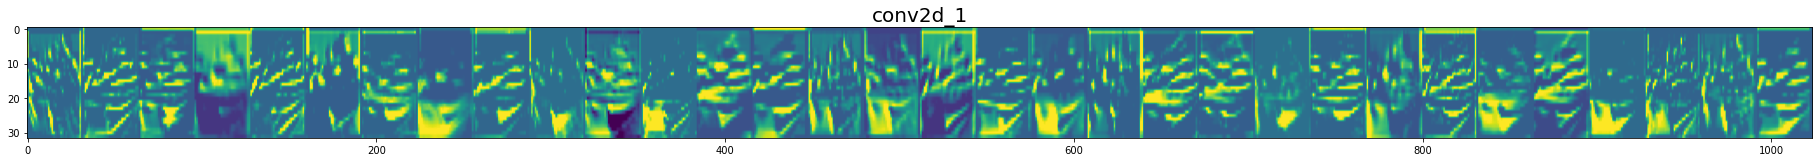

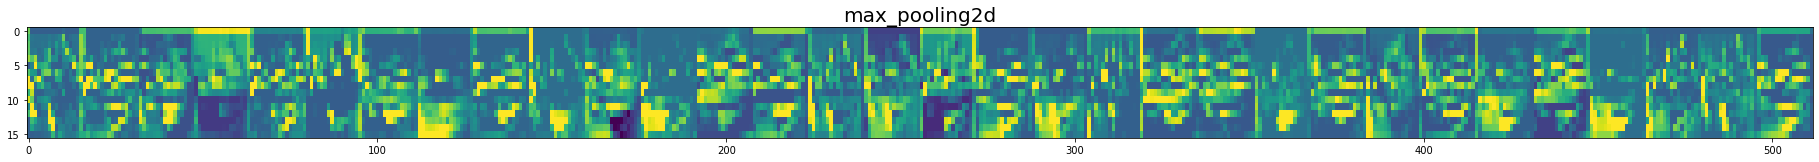

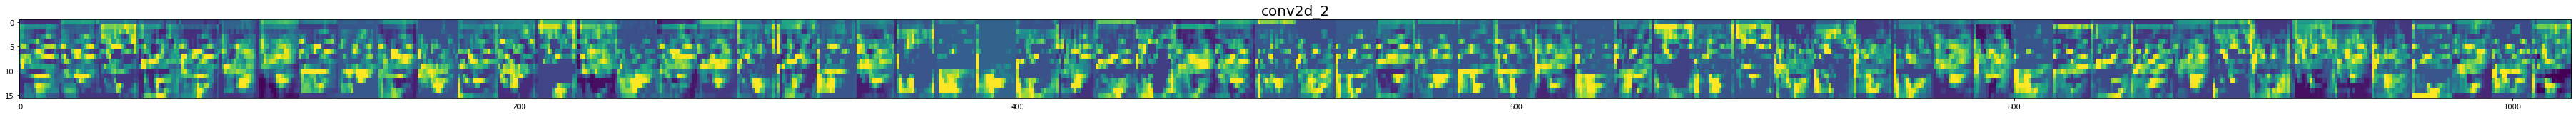

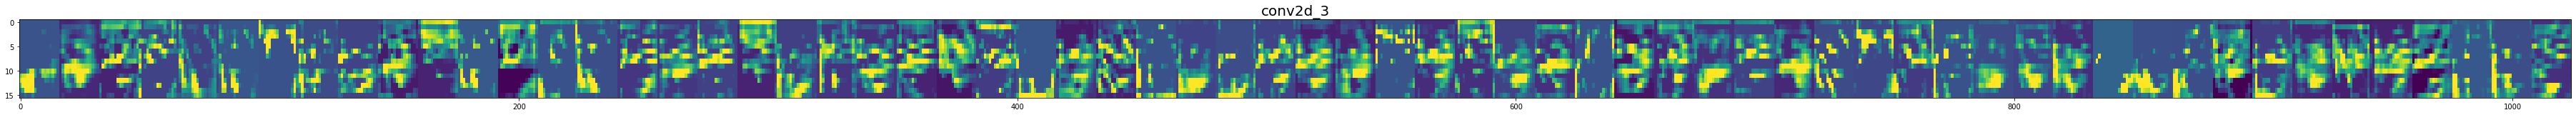

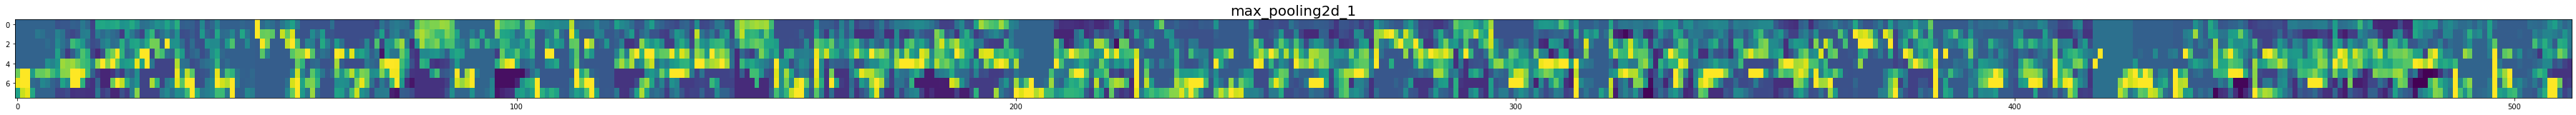

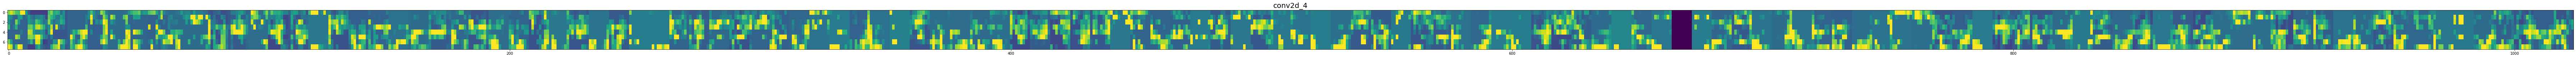

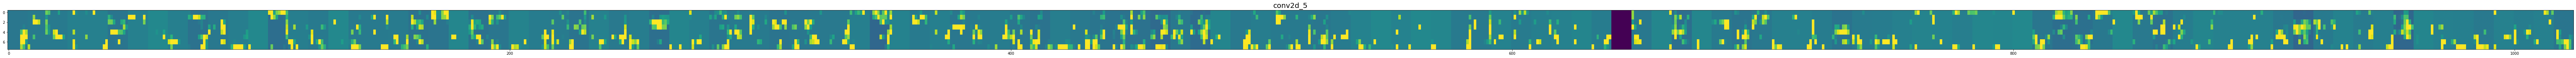

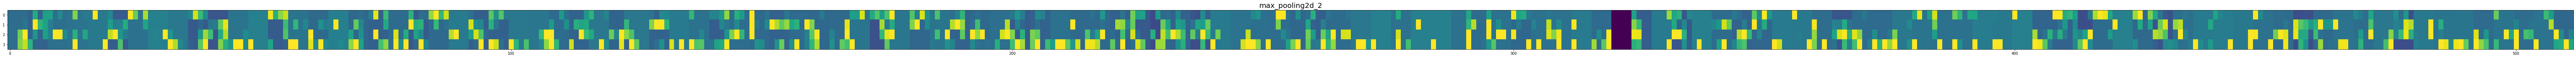

In [12]:
import tensorflow as tf

get_layer_name = [layer.name for layer in model.layers]
get_output = [layer.output for layer in model.layers]

# 모델 전체에서 output을 가져올 수 있다.
visual_model = tf.keras.models.Model(inputs = model.input, outputs = get_output)

# 테스트셋의 두 번째 데이터는 '배'이다.
test_img = np.expand_dims(x_test[1], axis=0)
feature_maps = visual_model.predict(test_img)

for layer_name, feature_map in zip(get_layer_name, feature_maps):
  # Dense층은 제외한다.
  if(len(feature_map.shape) == 4):
    img_size = feature_map.shape[1]
    features = feature_map.shape[-1]

    display_grid = np.zeros((img_size, img_size * features))
    # 각 특징맵을 display_grid 배열에 이어붙인 것이다.
    for i in range(features):
      x = feature_map[0, :, :, i]
      x -= x.mean(); x /= x.std()
      x *= 64; x+= 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * img_size : (i + 1) * img_size] = x

    plt.figure(figsize = (features, 2 + 1./features))
    plt.title(layer_name, fontsize = 20)
    plt.grid(False)
    plt.imshow(display_grid, aspect ='auto', cmap='viridis')


# 4. 과대적합 피하기

과대적합을 방지할 수 있는 방법을 알아보도록 한다. 여기서 다루는 방법은 단지 예방책일 뿐 과대적합 문제를 100% 해결해주지 않는다.

## 1) 규제화 함수 사용하기

규제화 함수(Regularizer)는 임의로 모델의 복잡도를 제한시키는 것을 의미한다. 대표적으로 L1 노름, L2 노름, L1 노름과 L2 노름을 혼합한 엘라스틱넷(ElasticNet)이 있다. 딥러닝 분야를 다루는 많은 논문에서 이를 가중치 감쇠(Weight Decay)라고 표현하기도 한다.

 - tensorflow.keras.regularizers.l1(l=0.01) : 가중치의 절댓값합
 - tensorflow.keras.regularizers.l2(l=0.01) : 가중치의 제곱합
 - tensorflow.keras.regularizers.l1_l2(l1=0.01, l2=0.01) : (혼합)절댓값합 + 제곱합

각 규제화 함수는 기능에 맞게 가중치의 합을 구하여 손실 함수에 더하게 된다. 예를 들어 l2 규제화 함수는 가중치의 제곱합을 구한 뒤, 이를 손실 함수에 더해준다.

In [13]:
# CIFAR-10 규제화 함수 사용해보기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size= 3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size=3, padding ='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters = 64, kernel_size=3, padding ='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides=2, padding='same'))
model.add(Conv2D(filters = 128, kernel_size=3, padding ='same', activation='relu'))
model.add(Conv2D(filters = 128, kernel_size=3, padding ='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [15]:
# CIFAR-10 모델 학습하기
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 21s 18ms/step - loss: 2.1373 - acc: 0.4083 - val_loss: 1.8085 - val_acc: 0.5077
Epoch 2/30
1094/1094 [==============================] - 19s 17ms/step - loss: 1.6968 - acc: 0.5451 - val_loss: 1.6073 - val_acc: 0.5639
Epoch 3/30
1094/1094 [==============================] - 19s 17ms/step - loss: 1.4918 - acc: 0.6115 - val_loss: 1.4578 - val_acc: 0.6158
Epoch 4/30
1094/1094 [==============================] - 22s 20ms/step - loss: 1.3416 - acc: 0.6600 - val_loss: 1.3454 - val_acc: 0.6465
Epoch 5/30
1094/1094 [==============================] - 22s 20ms/step - loss: 1.2221 - acc: 0.6947 - val_loss: 1.2765 - val_acc: 0.6653
Epoch 6/30
1094/1094 [==============================] - 22s 20ms/step - loss: 1.1161 - acc: 0.7272 - val_loss: 1.1968 - val_acc: 0.6899
Epoch 7/30
1094/1094 [==============================] - 19s 18ms/step - loss: 1.0278 - acc: 0.7529 - val_loss: 1.1745 - val_acc: 0.7007
Epoch 8/30
1094/1094 [==========================

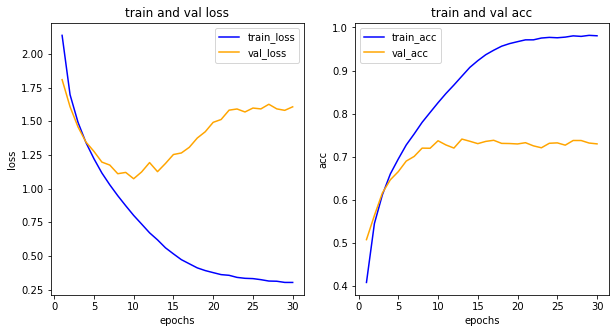

In [16]:
# CIFAR-10 학습 과정 그려보기.
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5 ))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange',label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

규제화 함수를 사용하지 않은 모델에 비해 비교적 그래프가 안정적으로 그려진다.

## 2) 드롭아웃

드롭아웃(Dropout)은 과대적합을 피하기 위해 사용되는 대표적인 방법 중 하나이다. 영어 단어에서 볼 수 있듯이 무언가를 드롭하는 방법이며, **학습이 진행되는 동안 신경망의 일부 유닛을 제외(드롭)한다.** 신경망 모델은 드롭아웃으로 제외한 유닛 대신 제외하지 않은 유닛을 집중적으로 학습하게 되면서 과대적합 문제를 방지함과 동시에 더 나은 성능을 기대할 수 있다. 일종의 선택과 집중이라 볼 수 있다.

테스트 시에는 드롭아웃이 작동하지 않고, 모든 유닛이 활성화되어 출력하게 된다. 대신, 출력값을 드롭아웃 비율만큼 줄여주게 된다. 드롭아웃 비율(Dropout Rate)은 일반적으로 0.2~0.5를 사용한다.

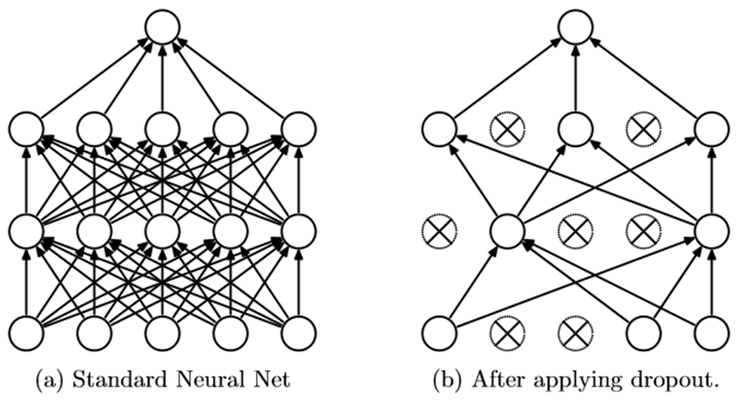

드롭아웃을 모델에 추가하고 결과를 확인한다.

In [17]:
# CIFAR-10 드롭아웃 사용해보기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size= 3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters = 32, kernel_size=3, padding ='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides=2, padding='same'))
model.add(Dropout(0.2)) # 드롭아웃 추가

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters = 64, kernel_size=3, padding ='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size = (2, 2), strides=2, padding='same'))
model.add(Dropout(0.2)) # 드롭아웃 추가

model.add(Conv2D(filters = 128, kernel_size=3, padding ='same', activation='relu'))
model.add(Conv2D(filters = 128, kernel_size=3, padding ='same', activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.2)) # 드롭아웃 추가

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [19]:
# CIFAR-10 모델 학습하기
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 21s 19ms/step - loss: 2.2544 - acc: 0.3648 - val_loss: 1.9098 - val_acc: 0.4800
Epoch 2/30
1094/1094 [==============================] - 19s 18ms/step - loss: 1.8000 - acc: 0.5041 - val_loss: 1.6794 - val_acc: 0.5423
Epoch 3/30
1094/1094 [==============================] - 22s 20ms/step - loss: 1.6090 - acc: 0.5629 - val_loss: 1.5387 - val_acc: 0.5783
Epoch 4/30
1094/1094 [==============================] - 19s 18ms/step - loss: 1.4709 - acc: 0.6034 - val_loss: 1.4184 - val_acc: 0.6164
Epoch 5/30
1094/1094 [==============================] - 22s 20ms/step - loss: 1.3702 - acc: 0.6323 - val_loss: 1.3132 - val_acc: 0.6506
Epoch 6/30
1094/1094 [==============================] - 20s 18ms/step - loss: 1.2804 - acc: 0.6597 - val_loss: 1.2474 - val_acc: 0.6639
Epoch 7/30
1094/1094 [==============================] - 22s 20ms/step - loss: 1.2048 - acc: 0.6824 - val_loss: 1.1691 - val_acc: 0.6896
Epoch 8/30
1094/1094 [==========================

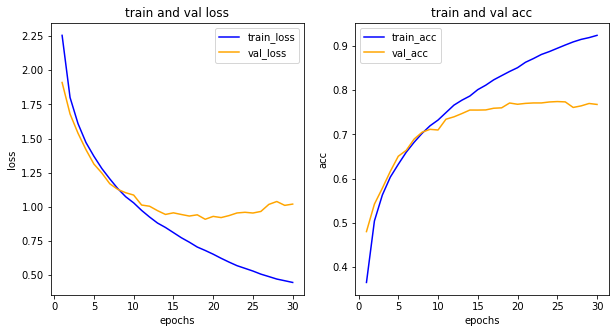

In [20]:
# CIFAR-10 학습 과정 그려보기.
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5 ))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange',label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

그래프가 다소 불안정해 보이지만 문제가 되지 않는다. 중요한 것은 두 그래프의 선이 벌어지지 않고 있다는 점이다. 과대적합을 해결할 방법을 사용하지 않은 모델, 규제화 함수를 사용한 모델과 비교했을 때 과대적합을 방지하기에 드롭아웃 방법은 매우 강력해 보인다.

하지만 드롭아웃은 학습 속도를 느리게 하는 단점이 존재한다.

## 3) 배치 정규화

이 방법은 근본적으로 과대적합을 피하기 위한 방법은 아니다. 일반적으로 방법은 다르지만, 드롭아웃과 비교하여 설명되기에 확인하도록 한다.

배치 정규화(Batch Normalization)는 논문에 따르면 내부 공선성(Internal Convariance Shift)을 해결하기 위해 고안되었다고 서술되어 있다. 이를 쉽게 설명하도록 한다. 신경망층의 출력값은 다양한 입력 데이터에 따라 쉽게 변할 수 있는데, 매우 큰 범위의 출력값은 신경망을 불안정하게 하여 성능 저하를 일으킬 수 있다. 배치 정규화는 신경망층의 출력값이 가질 수 있는 범위, 즉 출력값 분포의 범위를 줄여주어 불확실성을 어느 정도 감소시키는 방법이다. 배치 정규화의 장점은 다음과 같다.
 - 기존 신경망은 높은 학습률을 사용하는 경우, 그래디언트 손실/폭발의 문제점이 존재한다. 하지만 배치 정규화를 사용하면, 이러한 문제를 방지할 수 있어 높은 학습률을 사용하여 빠른 속도로 학습을 진행할 수 있게 한다.
 - 배치 정규화는 자체적인 규제 효과가 있기 때문에, 과대적합 문제를 피할 수 있게 한다. 다만, 이같은 장점은 도움이 될 뿐 보장하지는 않는다. "이를 사용하면 별도의 규제화 함수나 드롭아웃을 사용하지 않아도 된다"라는 의견이 다수이다.

배치 정규화를 사용할 경우, 일반적으로 다음과 같은 순서를 사용하여 모델을 구성한다.
 - Dense층 또는 Conv2D층 -> BatchNormalization() -> Activation()

In [21]:
# CIFAR-10 배치 정규화 사용해보기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)       

In [23]:
# CIFAR-10 모델 학습하기
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 25s 21ms/step - loss: 1.9434 - acc: 0.4661 - val_loss: 1.6504 - val_acc: 0.5647
Epoch 2/30
1094/1094 [==============================] - 21s 19ms/step - loss: 1.4776 - acc: 0.6250 - val_loss: 1.7144 - val_acc: 0.5601
Epoch 3/30
1094/1094 [==============================] - 24s 22ms/step - loss: 1.2505 - acc: 0.6969 - val_loss: 1.3658 - val_acc: 0.6436
Epoch 4/30
1094/1094 [==============================] - 21s 19ms/step - loss: 1.0796 - acc: 0.7487 - val_loss: 1.3516 - val_acc: 0.6424
Epoch 5/30
1094/1094 [==============================] - 21s 20ms/step - loss: 0.9313 - acc: 0.7945 - val_loss: 1.2570 - val_acc: 0.6655
Epoch 6/30
1094/1094 [==============================] - 21s 19ms/step - loss: 0.8166 - acc: 0.8293 - val_loss: 1.1771 - val_acc: 0.6863
Epoch 7/30
1094/1094 [==============================] - 21s 20ms/step - loss: 0.7045 - acc: 0.8615 - val_loss: 1.2004 - val_acc: 0.6793
Epoch 8/30
1094/1094 [==========================

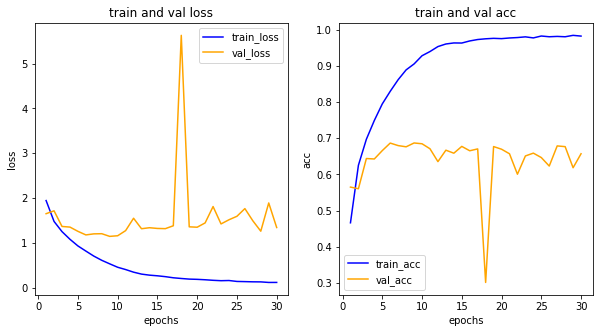

In [24]:
# CIFAR-10 학습 과정 그려보기.
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5 ))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange',label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

대략 10 에폭 이후로 과대적합이 발생하고 있지만, 가장 높은 성능을 달성했다는 점에서 이를 보완할 수 있다. 배치 정규화는 다수의 모델에서 사용되고 있기에 자주 접하게 될 것이다.

**기본 신경망**

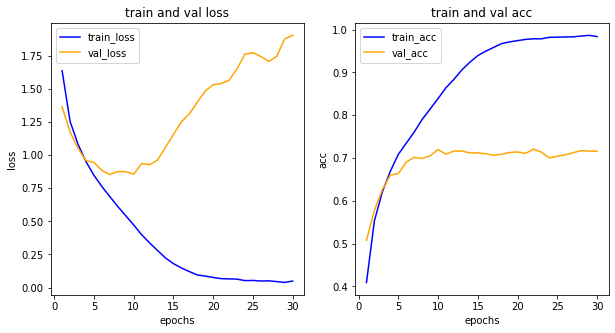

**규제 사용**


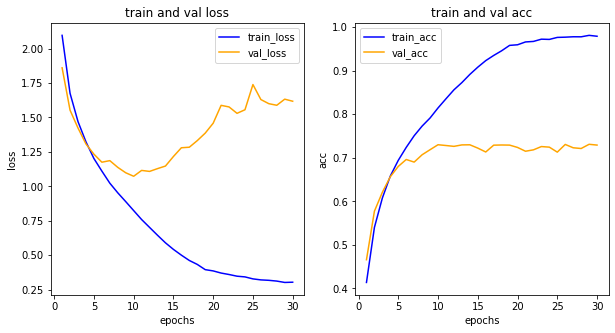

**드롭아웃**

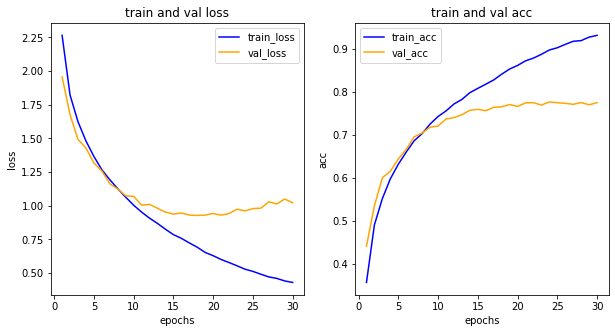

**배치정규화**



여기까지 과대적합을 방지하는 방법에 대해 알바보도록 했다. 물론 가장 좋은 방법은 과대적합을 피하기 위한 방법을 사용하기 전에 데이터를 충분히 모아두고, 파악하는 것이다.

# 5. 데이터 증식 사용하기

CIFAR-10 데이터셋에서 배치 정규화를 사용한 모델을 통해 대략 80%의 정확도를 달성했다. 다음으로 데이터 증식(Data Augmentation)을 사용하여 성능을 좀 더 높여보도록한다. 데이터 증식은 기존 데이터에 적절한 변형을 추가하여 새로운 데이터를 만들어내는 방법이다. 이 방법은 딥러닝의 고질적인 문제인 일반화(Generalization) 문제의 대응책으로 이야기되기도 하지만, 근본적으로는 문제를 해결하지 못한다.

데이터 증식의 장점은 다음과 같다.
 - 다양한 데이터를 입력시킴으로써 모델을 더욱 견고하게 만들어주기 때문에 테스트 시에 더 높은 성능을 기대할 수 있다.
 - 수집된 데이터가 적은 경우에 강력한 힘을 발휘한다.

데이터가 적은 경우 모델을 일반화시키기 어렵기 때문에, 테스트 시에 성능이 저하될 우려가 높으며, 과대적합이 발생할 확률이 매우 높다. 모델을 학습시키기에 충분한 데이터가 수집되었다면 사용하지 않아도 좋지만, 실제 환경에서는 그렇지 않은 경우가 많아 데이터 증식을 자주 사용한다. 또한, 데이터 증식은 모델 성능에 큰 영향을 끼치기 때문에 많은 관련 연구가 활발하게 진행되고 있다. 특히 데이터 증식을 자동으로 해주는 방법도 연구되고 있다(auto augmentation).

이미지 데이터에서의 데이터 증식은 다양한 이미지 변환 방식을 데이터에 적용하여 모델에 입력하게 되는데, 케라스는 이를 위한 이미지 제너레이터(Image Generator)를 제공한다. 이미지 제너레이터가 제공하는 변환 방식은 다음과 같다.
 - width_shift_range : 임의의 크기만큼 너비 방향으로 이동시킨다.
  - 0.2이고 이미지의 너비가 100이라면, -20~+20의 범위에서 너비 방향으로 이동시킨다.

 - height_shift_range : 임의의 크기만큼 높이 방향으로 이동시킨다.
  - 0.2이고 이미지의 높이가 100이라면, -20~+20의 범위에서 높이 방향으로 이동시킨다.

 - brightness_range : 이미지의 밝기 정도를 조정한다.
  - (0.5, 1.5)이면 원본 대비 최대 50%의 비율로 어둡거나 밝게 조절한다.

 - shear_range : 시계 반대 방향으로 밀림 강도를 조절한다.
  - 0.5이면 최대 50%의 비율로 시계 반대 방향으로 기울어지게 된다.

 - zoom_range : 임의의 비율만큼 이미지를 확대/축소시킨다.
  - 0.5이면, 0.5~1.5배의 범위에서 이미지 크기를 조절한다.

 - rotation_range : 이미지를 임의로 회전시킨다
  - 180이라면, 0~180의 범위에서 임의로 이미지를 회전시킨다.

 - rescale : 이미지 픽셀값의 크기를 조절한다.
  - 1/255이면, 각 픽셀값에 해당 값이 곱해진다.

 - fill_mode : 이미지 변환 시에 새로 생기는 픽셀을 채울 방법을 결정한다.
  - ['nearest', 'constant', 'reflect or wrap']

 - horizontal_flip : True일 경우, 임의로 이미지를 수평 방향으로 뒤집는다.

 - vertical_flip ; True일 경우, 임의로 이미지를 수직 방향으로 뒤집는다.

 - preprocessing_function : 사용자 정의 전처리 함수 또는 전처리 함수를 적용한다.

In [25]:
# 이미지 제너레이터를 사용하여 몇 개의 이미지 그려보기.
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np

train_datagen = ImageDataGenerator(horizontal_flip =True,
                                   vertical_flip = True,
                                   shear_range = 0.5,
                                   brightness_range = [0.5, 1.5],
                                   zoom_range = 0.2,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest')



In [26]:
# 햄버거 사진을 불러옵니다.
hamburger = img_to_array(load_img('/content/오히려좋아.png')).astype(np.uint8)
plt.figure(); plt.title('original image')
plt.imshow(hamburger)

# 제네레이터를 사용해서 이미지를 변환합니다.
hamburger = hamburger.reshape((1, ) + hamburger.shape)
train_generator = train_datagen.flow(hamburger, batch_size = 1)

fig = plt.figure(figsize = (5, 5))
fig.suptitle('augmented image')

for i in range(9):
    data = next(train_generator) # 제네레이터에게서 이미지를 받아옵니다.
    image = data[0]
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(image, dtype = np.uint8), cmap = 'gray')
    
plt.show()


FileNotFoundError: ignored

데이터 증식 방법을 사용하여 모델을 학습시켜보고 결과를 확인한다.

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(horizontal_flip = True,
                                   zoom_range = 0.2,
                                   width_shift_range  =0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 30,
                                   fill_mode = 'nearest')

val_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size)

val_generator = val_datagen.flow(x_val, y_val, batch_size, batch_size)


# CIFAR-10 배치 정규화 사용해보기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = Adam(1e-4),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])


In [ ]:

def get_step(train_len, batch_size):
  if (train_len % batch_size > 0):
    return train_len // batch_size + 1

  else:
    return train_len // batch_size

history = model.fit(train_generator,
                    epochs = 100, # 원래 코드는 100
                    steps_per_epoch = get_step(len(x_train), batch_size),
                    validation_data = val_generator,
                    validation_steps = get_step(len(x_val), batch_size))

Epoch 1/100
1094/1094 [==============================] - 48s 43ms/step - loss: 2.1179 - acc: 0.0945 - val_loss: 1.7752 - val_acc: 0.0959
Epoch 2/100
1094/1094 [==============================] - 41s 38ms/step - loss: 1.7924 - acc: 0.1027 - val_loss: 1.7081 - val_acc: 0.1078
Epoch 3/100
1094/1094 [==============================] - 40s 37ms/step - loss: 1.6340 - acc: 0.1015 - val_loss: 1.5274 - val_acc: 0.0849
Epoch 4/100
1094/1094 [==============================] - 40s 37ms/step - loss: 1.5163 - acc: 0.1011 - val_loss: 1.4987 - val_acc: 0.0757
Epoch 5/100
1094/1094 [==============================] - 40s 37ms/step - loss: 1.4217 - acc: 0.1018 - val_loss: 1.2336 - val_acc: 0.0970
Epoch 6/100
1094/1094 [==============================] - 40s 37ms/step - loss: 1.3299 - acc: 0.1039 - val_loss: 1.2273 - val_acc: 0.0931
Epoch 7/100
1094/1094 [==============================] - 41s 37ms/step - loss: 1.2604 - acc: 0.1015 - val_loss: 1.3230 - val_acc: 0.0713
Epoch 8/100
1094/1094 [==================

In [ ]:
# CIFAR-10 학습 과정 그려보기.
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10,5 ))

# 학습 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange',label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

데이터 증식 방법을 사용하여 과대적합 문제를 줄이고, 향상된 성능을 얻을 수 있다. model.fit()에서 steps_per_epoch 인자의 사용을 볼 수 있다. steps_per_epoch은 1 에폭에 배치 크기만큼의 데이터를 며 번 전달해줄지 결정하는 인자이다. 여기서는 '학습 데이터의 개수/배치 크기'인 1,094번 (35000/32)의 스텝을 통해 전체 데이터를 사용하게 된다. 코드에서는 미리 정의한 get_steps() 함수를 통해 해당 인자의 값을 전달하고 있다. 만약 1,094보다 작은 수를 전달할 경우, 전체 데이터를 사용하지 않으므로 주의해야 한다. validation_steps 인자도 이와 동일하다.